## Team 2:

* Paula Demacker
* Xinping Yu
* Yuzhe Zheng
* Peter Mankiewich

# Problem to solve
Recently, identifying medical diagnoses and treatable diseases by image-based deep learning has become more and more critical. Our project will focus on the similar topic, predicting normal or pneumonia based on their X-ray images. This is important because, the WHO estimates that over 4 million premature deaths occur annually from household air pollution-related diseases, including pneumonia. For these populations, the accurate and fast diagnosis means everything. It can guarantee timely access to treatment and save much-needed time and money for them. The implementation can support hospitals and doctors by preselecting the x-rays, but this will only be possible for a reliable and highly accurate algorithm.

For our project, we will build an algorithm to automatically identify whether a patient is suffering from pneumonia or not by looking at their chest X-ray images. The more accurate our model is built, the more time and money to save for this group of people.

This type of model, and machine learning in general have great value for the health care sector. The ability to have a second opinion when it comes to diagnosis improves patient outcomes. On the business side, there is great opportunity in selling these tools to health care providers. Also, a software product that includes deep learning algorithms provides a win-win to pharmaceutical companies who want to sell more prescriptions faster. Better patient outcomes leads to more customer satisfaction after someone with pneumonia is diagnosed and prescribed a treatment. In addition, as the model is exposed to more training data, a pharmaceutical company can potentially use this data and the accuracy rates to improve treatments, the model, and their understanding of the disease.

# Data 
We choose the Chest -Ray Images dataset from Kaggle. The datasets contain three folders: train, test and validation, and each folder has x-ray images in two categories: normal and pneumonia. In total, there are 5863 X-Ray images (JPEG). All chest x-ray images were obtained from the Guangzhou Women's and Children's Medical Center, and the images included the anterior chest and posterior back of patients aged one to five years. For better analysis of chest x-ray images, all images have undergone an initial quality control screening and low quality or unreadable scans have been removed.


In [1]:
# Imports
import pandas as pd 
import numpy as np
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import glob
from matplotlib import image
from sklearn.model_selection import train_test_split

In [2]:
# check to see that we are using a 2.x version
print(tf.__version__)

2.3.0


The code cell below is used for preprocessing the images. The image files are assigned random strings for names, sorted in the file browser, and then distributed into train, validation, and test dataset folders based on a 70/10/20 split. This process ensures randomization, and that the images are divided in correct proportions.

In [4]:
# ASSIGN RANDOM FILE NAMES
# normal_path = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/NORMAL'
# p_path = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/PNEUMONIA'
# rand_len = 10
# import random, string, os
# for i, filename in enumerate(os.listdir(normal_path)):
#     rand_str = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(rand_len))
#     src = normal_path + '/' + filename
#     dst = normal_path + '/' + rand_str + '.jpeg'
#     os.rename(src, dst)

# for i, filename in enumerate(os.listdir(p_path)):
#     rand_str = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(rand_len))
#     src = p_path + '/' + filename
#     dst = p_path + '/' + rand_str + '.jpeg'
#     os.rename(src, dst)

# EDA: Reading in and visualizing images

We started by reading in the image files, and saving them in a numerical representation in a multi-dimensional list. We found that we have an unbalanced dataset, with 1583 healthy images of lungs and 4273 infected images of lungs in the training dataset. As a result, the network may not be as good at detecting healthy lungs. We may have a large number of false negatives. As we train the Neural network later in this model, we will take this inbalance into account.

Also, we don't see this as a disadvantage, because in practice, a human doctor would have the final call in diagnosis. It is better to classify healthy lungs as sick lungs, rather than sick lungs as healthy lungs. By having this bias, the network will avoid diagnosing a sick person as healthy so that any potentially sick person can receive care.

In [121]:
def plot_distribution(name, data):
    plt.hist(data)
    plt.title(name)
    plt.show()

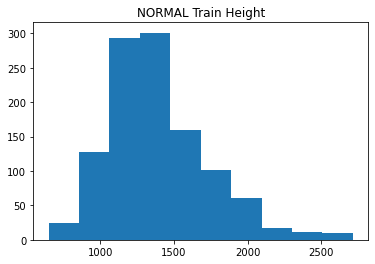

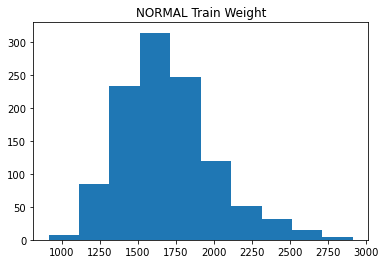

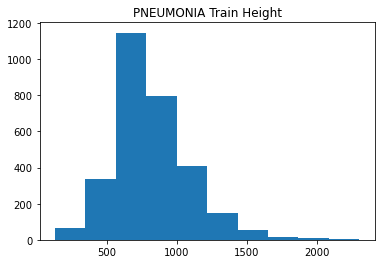

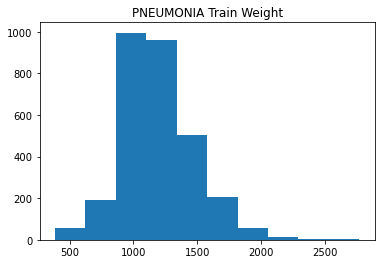

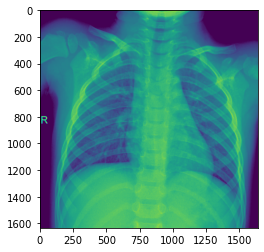

In [122]:
path_n = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/train/NORMAL'
path_p = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/train/PNEUMONIA'

images_train = []
truth_train = []
n_height_train1 = []
n_weight_train1 = []
n_height_train2 = []
n_weight_train2 = []

# NORMAL
for path in os.listdir(path_n):
    if path.endswith('.jpeg'):
        try:
            im = image.imread(path_n + '/' + path)
            # img = PIL.Image.open(path_n + '/' + image)
            # im = array(img)
            images_train.append(im)
            truth_train.append([0])
            n_height_train1.append(im.shape[0])
            n_weight_train1.append(im.shape[1])
        except:
            print("image not found: " + path)

plot_distribution('NORMAL Train Height', n_height_train1)
plot_distribution('NORMAL Train Weight', n_weight_train1)


# PNEUMONIA
for path in os.listdir(path_p):
    if path.endswith('.jpeg'):
        try:
            im = image.imread(path_p + '/' + path)
            # img = PIL.Image.open(path_n + '/' + image)
            # im = array(img)
            images_train.append(im)
            truth_train.append([1])
            n_height_train2.append(im.shape[0])
            n_weight_train2.append(im.shape[1])
        except:
            print("image not found: " + path)

plot_distribution('PNEUMONIA Train Height', n_height_train2)
plot_distribution('PNEUMONIA Train Weight', n_weight_train2)  

plt.imshow(np.array(images_train[0]).astype("uint8"))

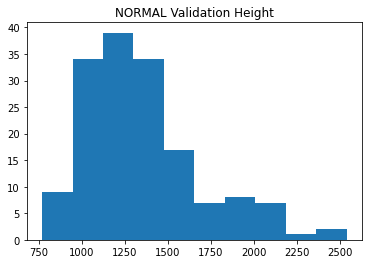

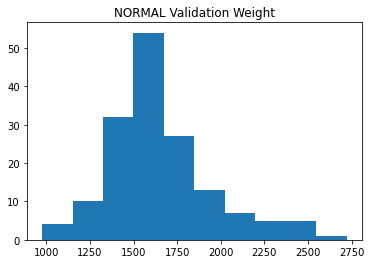

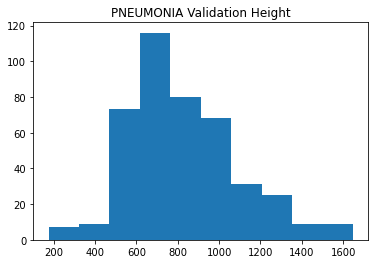

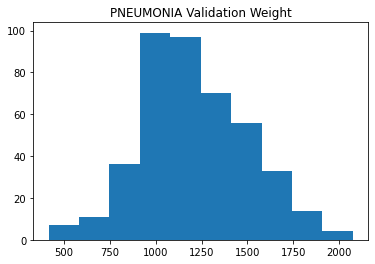

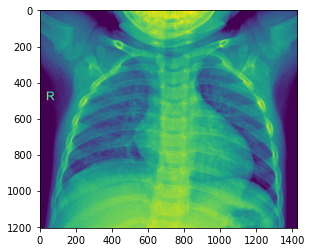

In [123]:
# VALIDATION
path_n = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/val/NORMAL'
path_p = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/val/PNEUMONIA'

images_valid = []
truth_valid = []
n_height_valid1 = []
n_weight_valid1 = []
n_height_valid2 = []
n_weight_valid2 = []

# NORMAL
for path in os.listdir(path_n):
    if path.endswith('.jpeg'):
        try:
            im = image.imread(path_n + '/' + path)
            # img = PIL.Image.open(path_n + '/' + image)
            # im = array(img)
            images_valid.append(im)
            truth_valid.append([0])
            n_height_valid1.append(im.shape[0])
            n_weight_valid1.append(im.shape[1])
        except:
            print("image not found: " + path)

plot_distribution('NORMAL Validation Height', n_height_valid1)
plot_distribution('NORMAL Validation Weight', n_weight_valid1)

# PNEUMONIA
for path in os.listdir(path_p):
    if path.endswith('.jpeg'):
        try:
            im = image.imread(path_p + '/' + path)
            # img = PIL.Image.open(path_n + '/' + image)
            # im = array(img)
            images_valid.append(im)
            truth_valid.append([1])
            n_height_valid2.append(im.shape[0])
            n_weight_valid2.append(im.shape[1])
        except:
            print("image not found: " + path)

plot_distribution('PNEUMONIA Validation Height', n_height_valid2)
plot_distribution('PNEUMONIA Validation Weight', n_weight_valid2)

plt.imshow(np.array(images_valid[0]).astype("uint8"))

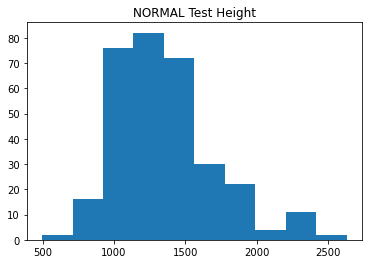

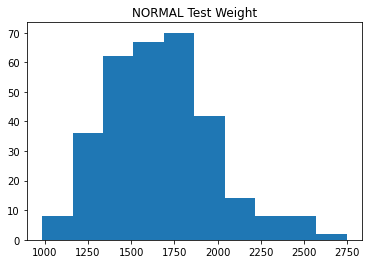

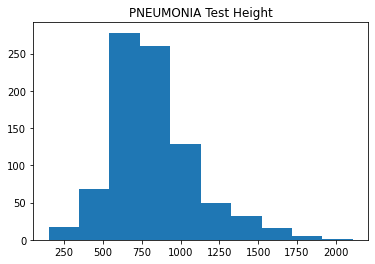

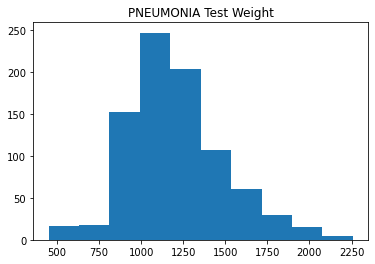

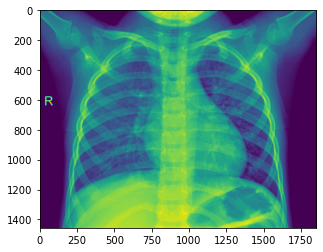

In [124]:
# TEST
path_n = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/test/NORMAL'
path_p = 'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/test/PNEUMONIA'

images_test = []
truth_test = []
n_height_test1 = []
n_weight_test1 = []
n_height_test2 = []
n_weight_test2 = []

# NORMAL
for path in os.listdir(path_n):
    if path.endswith('.jpeg'):
        try:
            im = image.imread(path_n + '/' + path)
            # img = PIL.Image.open(path_n + '/' + image)
            # im = array(img)
            images_test.append(im)
            truth_test.append([0])
            n_height_test1.append(im.shape[0])
            n_weight_test1.append(im.shape[1])
        except:
            print("image not found: " + path)

plot_distribution('NORMAL Test Height', n_height_test1)
plot_distribution('NORMAL Test Weight', n_weight_test1)

# PNEUMONIA
for path in os.listdir(path_p):
    if path.endswith('.jpeg'):
        try:
            im = image.imread(path_p + '/' + path)
            # img = PIL.Image.open(path_n + '/' + image)
            # im = array(img)
            images_test.append(im)
            truth_test.append([1])
            n_height_test2.append(im.shape[0])
            n_weight_test2.append(im.shape[1])
        except:
            print("image not found: " + path)

plot_distribution('PNEUMONIA Test Height', n_height_test2)
plot_distribution('PNEUMONIA Test Weight', n_weight_test2)

plt.imshow(np.array(images_test[0]).astype("uint8"))

In [126]:
xp = n_height_test2 + n_height_valid2 + n_height_train2
yp = n_weight_test2 + n_weight_valid2 + n_weight_train2
xn = n_height_test1 + n_height_valid1 + n_height_train1
yn = n_weight_test1 + n_weight_valid1 + n_weight_train1

In the combined graphs, we can see furthur evidence that on average, the size of the images in the pneumonia class are smaller (blue histogram), compared to the images in the normal class (red historgram).

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           2.,   4.,   5.,  14.,  19.,  26.,  43.,  58.,  65., 103., 101.,
         111., 111., 120., 121., 103.,  95.,  97.,  69.,  60.,  38.,  40.,
          27.,  31.,  18.,  14.,  14.,  15.,   8.,  16.,   7.,  11.,   4.,
           3.,   2.,   4.,   0.,   1.,   2.],
        [  7.,  36.,  24.,  11.,   3.,  19.,  38.,  38.,  88., 176., 250.,
         267., 416., 339., 273., 366., 265., 261., 278., 182., 183., 141.,
         123., 104.,  86.,  73.,  56.,  45.,  36.,  19.,  16.,  15.,  13.,
          16.,   1.,   3.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,   1.,   0.,   0.]]),
 array([ 384.  ,  434.64,  485.28,  535.92,  586.56,  637.2 ,  687.84,
         738.48,  789.12,  839.76,  890.4 ,  941.04,  991.68, 1042.32,
        1092.96, 1143.6 , 1194.24, 1244.88, 1295.52, 1346.16, 1396.8 ,
        1447.44, 1498.08, 1548.72, 1599.36, 1650.  , 1700.64, 1751.28,
        1801.92, 1852.

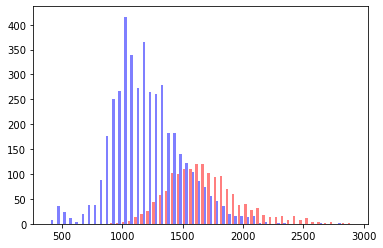

In [127]:
plt.hist([yn, yp], color=['r','b'], alpha=0.5, bins=50)

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   4.,
           4.,   7.,  25.,  18.,  40.,  54.,  84., 103., 103., 119.,  99.,
         116., 118.,  87.,  90.,  84.,  52.,  53.,  50.,  32.,  41.,  30.,
          26.,  27.,  24.,  12.,  16.,   8.,  11.,   7.,   5.,   6.,   7.,
           4.,   2.,   5.,   4.,   2.,   2.],
        [ 19.,  26.,  26.,  15.,  19.,  33., 104., 178., 341., 331., 395.,
         447., 367., 371., 281., 232., 181., 204., 136., 122.,  89.,  82.,
          56.,  46.,  34.,  27.,  26.,  17.,  19.,  11.,   9.,   9.,   2.,
           3.,   4.,   2.,   2.,   0.,   4.,   1.,   0.,   1.,   1.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 127.  ,  178.72,  230.44,  282.16,  333.88,  385.6 ,  437.32,
         489.04,  540.76,  592.48,  644.2 ,  695.92,  747.64,  799.36,
         851.08,  902.8 ,  954.52, 1006.24, 1057.96, 1109.68, 1161.4 ,
        1213.12, 1264.84, 1316.56, 1368.28, 1420.  , 1471.72, 1523.44,
        1575.16, 1626.

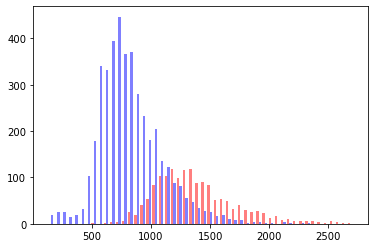

In [128]:
plt.hist([xn, xp], color=['r','b'], alpha=0.5, bins=50)

Below, we can visualize the distribution of samples in train, validation, and test. We can confirm that it follows a 70/10/20 split. Also, we can see that overall, there are more pneumonia images than there are normal images in the dataset.

<AxesSubplot:>

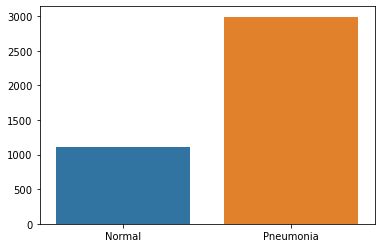

In [44]:
sns.barplot(x = ['Normal', 'Pneumonia'], y = [list(truth_train).count(0), list(truth_train).count(1)])

<AxesSubplot:>

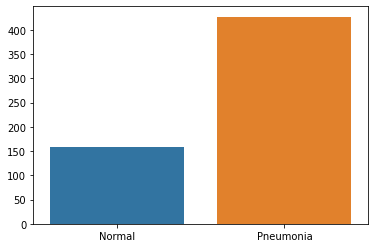

In [45]:
sns.barplot(x = ['Normal', 'Pneumonia'], y = [list(truth_valid).count(0), list(truth_valid).count(1)])

<AxesSubplot:>

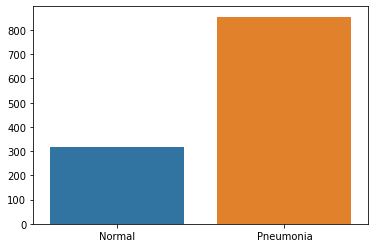

In [46]:
sns.barplot(x = ['Normal', 'Pneumonia'], y = [list(truth_test).count(0), list(truth_test).count(1)])

<AxesSubplot:>

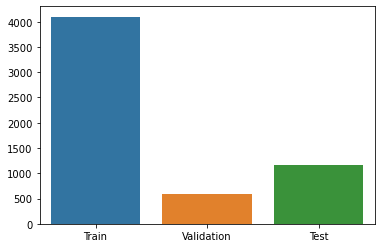

In [47]:
sns.barplot(x = ['Train', 'Validation', 'Test'], y = [len(truth_train), len(truth_valid),len(truth_test)])

# Training: Part 1

In part one of training, we read in the images and convert them to be 224 X 224 pixels. We start by implementing transfer learning and classifying the images using the MobileNet. We then move on to training our own networks later in the notebook.

In [173]:
# we started with a smaller image size for the MobileNet
IMG_SIZE = 224
image_size=(IMG_SIZE, IMG_SIZE)

In [174]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/train',
  seed=123,
  image_size=image_size,
  batch_size=32,
  label_mode='categorical'
)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/val',
  seed=123,
  image_size=image_size,
  batch_size=32,
  label_mode='categorical'
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/test',
  seed=123,
  image_size=image_size,
  batch_size=32,
  label_mode='categorical'
)

Found 4099 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Found 1172 files belonging to 2 classes.


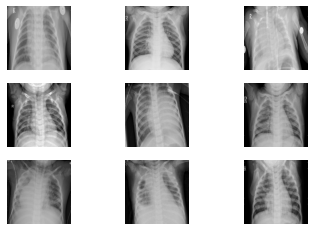

In [50]:
# take a look at some of the images in the dataset
one_batch = train_ds.take(1)
for images, labels in one_batch:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [175]:
# implement TensorBoard so that we can visualize the weights later
logdir = os.path.join("logsMobileNet", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# load the mobilenet network 
mobile = tf.keras.applications.MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
# set it to not trainable
mobile.trainable = False
mobile_1_layer = tf.keras.Sequential([    
      tf.keras.layers.experimental.preprocessing.Rescaling(1/255),             
      mobile,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(2, activation='softmax', name="dense_head")
])

In [52]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

## Mobile Net

Overall, MobileNet network performed the best out of any network, with the fozen layer network showing 96.4% accuracy out of sample in the test dataset.

In [176]:
# compile
lrate = 0.005
mobile_1_layer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [178]:
history_mobile_1_layer = mobile_1_layer.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=1,
    callbacks=[tensorboard_callback],
    epochs=10)

Epoch 1/10
129/129 [==============================] - 107s 831ms/step - loss: 0.3180 - accuracy: 0.8783 - val_loss: 0.1650 - val_accuracy: 0.9333
Epoch 2/10
129/129 [==============================] - 102s 789ms/step - loss: 0.1195 - accuracy: 0.9546 - val_loss: 0.1156 - val_accuracy: 0.9607
Epoch 3/10
129/129 [==============================] - 101s 785ms/step - loss: 0.1129 - accuracy: 0.9566 - val_loss: 0.1045 - val_accuracy: 0.9675
Epoch 4/10
129/129 [==============================] - 101s 784ms/step - loss: 0.0931 - accuracy: 0.9636 - val_loss: 0.2342 - val_accuracy: 0.9060
Epoch 5/10
129/129 [==============================] - 100s 777ms/step - loss: 0.0901 - accuracy: 0.9656 - val_loss: 0.1157 - val_accuracy: 0.9641
Epoch 6/10
129/129 [==============================] - 100s 772ms/step - loss: 0.0899 - accuracy: 0.9673 - val_loss: 0.1412 - val_accuracy: 0.9590
Epoch 7/10
129/129 [==============================] - 101s 784ms/step - loss: 0.0975 - accuracy: 0.9658 - val_loss: 0.1099 -

Plot of loss over epochs

[Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Loss'),
 Text(0.5, 1.0, 'Loss over Epochs')]

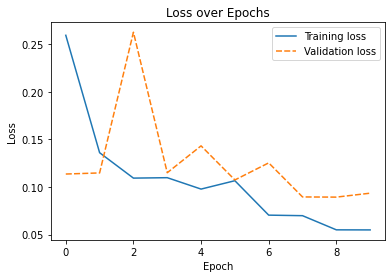

In [144]:
history_df = pd.DataFrame({'Training loss': history_mobile_1_layer.history['loss'], 'Validation loss': history_mobile_1_layer.history['val_loss']})
ax = sns.lineplot(data=history_df)
ax.set(xlabel='Epoch', ylabel='Loss', title='Loss over Epochs')

Plot of accuracy over epochs

[Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy over Epochs')]

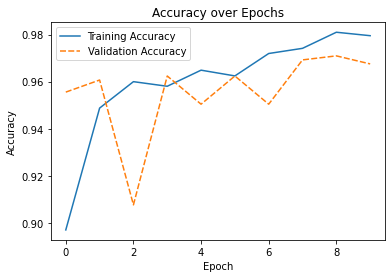

In [145]:
history_df = pd.DataFrame({'Training Accuracy': history_mobile_1_layer.history['accuracy'], 'Validation Accuracy': history_mobile_1_layer.history['val_accuracy']})
ax = sns.lineplot(data=history_df)
ax.set(xlabel='Epoch', ylabel='Accuracy', title='Accuracy over Epochs')

In [104]:
# evaluate on the test dataset
loss, accuracy = mobile_1_layer.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 18s 481ms/step - loss: 0.1023 - accuracy: 0.9642
Loss: 0.10227210819721222
Accuracy: 0.9641638398170471


In [55]:
# save the model
! mkdir -p saved_model
mobile_1_layer.save('saved_model/mobile_model1')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/mobile_model1\assets


This time, we will train the same model, but unfreeze the MobileNet. Teh accuracy is slighly lower than the model with frozen layers (out of sample in the test dataset).

In [56]:
# load the mobilenet network - trainable version
mobile = tf.keras.applications.MobileNet(input_shape=(224,224,3), weights='imagenet', include_top=False)
# set it to not trainable
mobile.trainable = True
mobile_2_layer = tf.keras.Sequential([   
      tf.keras.layers.experimental.preprocessing.Rescaling(1/255),              
      mobile,
      tf.keras.layers.GlobalAveragePooling2D(),
      tf.keras.layers.Dense(2, activation='softmax', name="dense_head")
])

In [57]:
# compile
lrate = 0.005
mobile_2_layer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [58]:
history_mobile_2_layer = mobile_2_layer.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=2,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 270s 2s/step - loss: 0.2554 - accuracy: 0.9285
Epoch 2/4
129/129 [==============================] - 269s 2s/step - loss: 0.1398 - accuracy: 0.9529 - val_loss: 1.3129 - val_accuracy: 0.6923
Epoch 3/4
129/129 [==============================] - 256s 2s/step - loss: 0.1203 - accuracy: 0.9571
Epoch 4/4
129/129 [==============================] - 273s 2s/step - loss: 0.1349 - accuracy: 0.9510 - val_loss: 0.1531 - val_accuracy: 0.9368


In [105]:
# evaluate on the test dataset
loss, accuracy = mobile_2_layer.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 18s 488ms/step - loss: 0.1820 - accuracy: 0.9317
Loss: 0.18200507760047913
Accuracy: 0.9317406415939331


In [59]:
# save the model
mobile_2_layer.save('saved_model/mobile_model2')

INFO:tensorflow:Assets written to: saved_model/mobile_model2\assets


# Trying our own models 

In the next section, we try several of our own models.

In the below model, we try using the **adagrad optimizer** with random rotation augmentation.

In [158]:
cnn_modelada = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1), #fraction of 2pi
    # tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(224,224,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.005
cnn_modelada.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=lrate,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad',
), loss='categorical_crossentropy' ,metrics=['accuracy'])

In [159]:
history_ada = cnn_modelada.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=1,
    epochs=4
)

Epoch 1/4
129/129 [==============================] - 376s 3s/step - loss: 0.6560 - accuracy: 0.3357 - val_loss: 0.5909 - val_accuracy: 0.2701
Epoch 2/4
129/129 [==============================] - 354s 3s/step - loss: 0.5799 - accuracy: 0.2703 - val_loss: 0.5750 - val_accuracy: 0.2701
Epoch 3/4
129/129 [==============================] - 359s 3s/step - loss: 0.5713 - accuracy: 0.2703 - val_loss: 0.5628 - val_accuracy: 0.2701
Epoch 4/4
129/129 [==============================] - 358s 3s/step - loss: 0.8273 - accuracy: 0.2703 - val_loss: 0.5705 - val_accuracy: 0.2701


In [161]:
# evaluate on the test dataset
loss, accuracy = cnn_modelada.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 39s 1s/step - loss: 0.5698 - accuracy: 0.2705
Loss: 0.569848895072937
Accuracy: 0.2704778015613556


Plot of loss over Epochs

[Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Loss'),
 Text(0.5, 1.0, 'Loss over Epochs')]

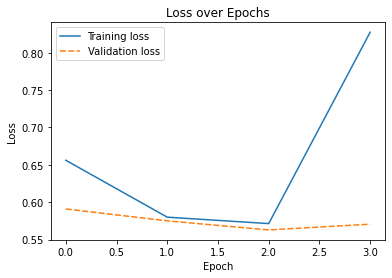

In [162]:
history_df = pd.DataFrame({'Training loss': history_ada.history['loss'], 'Validation loss': history_ada.history['val_loss']})
ax = sns.lineplot(data=history_df)
ax.set(xlabel='Epoch', ylabel='Loss', title='Loss over Epochs')

Plot of accuracy over Epochs

[Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy over Epochs')]

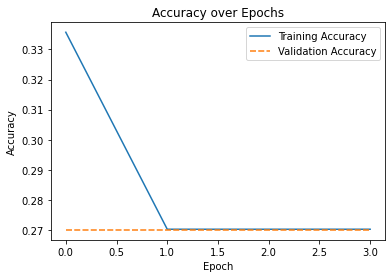

In [163]:
history_df = pd.DataFrame({'Training Accuracy': history_ada.history['accuracy'], 'Validation Accuracy': history_ada.history['val_accuracy']})
ax = sns.lineplot(data=history_df)
ax.set(xlabel='Epoch', ylabel='Accuracy', title='Accuracy over Epochs')

This model is a smaller model, similar to the ones we tried in class.

In [60]:
#first try 
cnn_model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(224,224,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.005
cnn_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [61]:
# fit the first model
history_first_try = cnn_model1.fit(
    train_ds, 
    validation_data=valid_ds,
    # validation_data=test_ds,
    validation_freq=2,
    epochs=4
)

Epoch 1/4
129/129 [==============================] - 301s 2s/step - loss: 11.6880 - accuracy: 0.7292
Epoch 2/4
129/129 [==============================] - 325s 3s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 3/4
129/129 [==============================] - 306s 2s/step - loss: 11.7612 - accuracy: 0.7297
Epoch 4/4
129/129 [==============================] - 312s 2s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299


In [106]:
# evaluate on the test dataset
loss, accuracy = cnn_model1.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 29s 787ms/step - loss: 11.7585 - accuracy: 0.7295
Loss: 11.758505821228027
Accuracy: 0.729522168636322


In [62]:
# save the first model
cnn_model1.save('saved_model/cnn_model1')

INFO:tensorflow:Assets written to: saved_model/cnn_model1\assets


In this next model, we try adding additional convolutional layers with 128 filters each.

In [64]:
cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(224,224,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.005
cnn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [65]:
#fit the second model
history_second_try = cnn_model2.fit(
    train_ds, 
    validation_data=valid_ds,
    # validation_split = 0.2,
    validation_freq=2,
    epochs=4
)

Epoch 1/4
129/129 [==============================] - 297s 2s/step - loss: 0.8218 - accuracy: 0.5657
Epoch 2/4
129/129 [==============================] - 321s 2s/step - loss: 0.6515 - accuracy: 0.5867 - val_loss: 0.5271 - val_accuracy: 0.7299
Epoch 3/4
129/129 [==============================] - 304s 2s/step - loss: 0.5935 - accuracy: 0.5506
Epoch 4/4
129/129 [==============================] - 329s 3s/step - loss: 0.6169 - accuracy: 0.4572 - val_loss: 0.5879 - val_accuracy: 0.2701


In [107]:
# evaluate on the test dataset
loss, accuracy = cnn_model2.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 32s 862ms/step - loss: 0.5879 - accuracy: 0.2705
Loss: 0.5878975987434387
Accuracy: 0.2704778015613556


In [66]:
# save the second model
cnn_model2.save('saved_model/cnn_model2')

INFO:tensorflow:Assets written to: saved_model/cnn_model2\assets


Next we simply try more epochs, using the simpler architecture that we had in the first model.

In [68]:
cnn_model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(224,224,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.005
cnn_model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [69]:
history_third_try = cnn_model3.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=2,
    epochs=10)

Epoch 1/10
129/129 [==============================] - 238s 2s/step - loss: 11.6961 - accuracy: 0.7292
Epoch 2/10
129/129 [==============================] - 252s 2s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 3/10
129/129 [==============================] - 230s 2s/step - loss: 11.7612 - accuracy: 0.7297
Epoch 4/10
129/129 [==============================] - 242s 2s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 5/10
129/129 [==============================] - 226s 2s/step - loss: 11.7612 - accuracy: 0.7297
Epoch 6/10
129/129 [==============================] - 251s 2s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 7/10
129/129 [==============================] - 229s 2s/step - loss: 11.7612 - accuracy: 0.7297
Epoch 8/10
129/129 [==============================] - 244s 2s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 9/10
1

In [108]:
# evaluate on the test dataset
loss, accuracy = cnn_model3.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 32s 869ms/step - loss: 11.7585 - accuracy: 0.7295
Loss: 11.758505821228027
Accuracy: 0.729522168636322


In [70]:
# save the third model
cnn_model3.save('saved_model/cnn_model3')

INFO:tensorflow:Assets written to: saved_model/cnn_model3\assets


In model 4, we are using our more complex architecture with two layers with 128 filters each, and a lower learning rate of 0.0005.

In [72]:
cnn_model4 = tf.keras.Sequential([
    # tf.keras.layers.RandomRotation(0.1), #fraction of 2pi
    # tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(224,224,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.0005
cnn_model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [73]:
history_fourth_try = cnn_model4.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=2,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 261s 2s/step - loss: 4.3384 - accuracy: 0.2710
Epoch 2/4
129/129 [==============================] - 269s 2s/step - loss: 4.3569 - accuracy: 0.2703 - val_loss: 4.3533 - val_accuracy: 0.2701
Epoch 3/4
129/129 [==============================] - 251s 2s/step - loss: 4.3569 - accuracy: 0.2703
Epoch 4/4
129/129 [==============================] - 271s 2s/step - loss: 4.3569 - accuracy: 0.2703 - val_loss: 4.3533 - val_accuracy: 0.2701


In [109]:
# evaluate on the test dataset
loss, accuracy = cnn_model4.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 32s 872ms/step - loss: 4.3596 - accuracy: 0.2705
Loss: 4.359586715698242
Accuracy: 0.2704778015613556


In [74]:
# save the fourth model
cnn_model4.save('saved_model/cnn_model4')

INFO:tensorflow:Assets written to: saved_model/cnn_model4\assets


Here, we try the same smaller learning rate and model complexity, but with binary cross entropy loss.

In [75]:
cnn_model5 = tf.keras.Sequential([
    # tf.keras.layers.RandomRotation(0.1), #fraction of 2pi
    # tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(224,224,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.0005
cnn_model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='binary_crossentropy' ,metrics=['accuracy'])

In [76]:
history_fourth_try = cnn_model5.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=2,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 213s 2s/step - loss: 7.6088 - accuracy: 0.7268
Epoch 2/4
129/129 [==============================] - 225s 2s/step - loss: 7.6246 - accuracy: 0.7297 - val_loss: 7.6246 - val_accuracy: 0.7299
Epoch 3/4
129/129 [==============================] - 166s 1s/step - loss: 7.6246 - accuracy: 0.7297
Epoch 4/4
129/129 [==============================] - 176s 1s/step - loss: 7.6246 - accuracy: 0.7297 - val_loss: 7.6246 - val_accuracy: 0.7299


In [110]:
# evaluate on the test dataset
loss, accuracy = cnn_model5.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 32s 871ms/step - loss: 7.6246 - accuracy: 0.7295
Loss: 7.624619960784912
Accuracy: 0.729522168636322


In [77]:
# save the fifth model
cnn_model5.save('saved_model/cnn_model5')

INFO:tensorflow:Assets written to: saved_model/cnn_model5\assets


This is a much more complex model, with four more convolutional layers added (256 filters and 512 filters). We use a higher learning rate of 0.05.

In [78]:
cnn_model6 = tf.keras.Sequential([
    # tf.keras.layers.RandomRotation(0.1), #fraction of 2pi
    # tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(224,224,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(256, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(512, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.05
cnn_model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='binary_crossentropy' ,metrics=['accuracy'])

In [79]:
history_sixth_try = cnn_model6.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=2,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 293s 2s/step - loss: 7.6108 - accuracy: 0.6253
Epoch 2/4
129/129 [==============================] - 310s 2s/step - loss: 7.6246 - accuracy: 0.7297 - val_loss: 7.6246 - val_accuracy: 0.7299
Epoch 3/4
129/129 [==============================] - 298s 2s/step - loss: 7.6246 - accuracy: 0.7297
Epoch 4/4
129/129 [==============================] - 314s 2s/step - loss: 7.6246 - accuracy: 0.7297 - val_loss: 7.6246 - val_accuracy: 0.7299


In [111]:
# evaluate on the test dataset
loss, accuracy = cnn_model6.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 40s 1s/step - loss: 7.6246 - accuracy: 0.7295
Loss: 7.624619960784912
Accuracy: 0.729522168636322


In [80]:
# save the 6th model
cnn_model6.save('saved_model/cnn_model6')

INFO:tensorflow:Assets written to: saved_model/cnn_model6\assets


# Trying a larger image size

In this next section, we use a larger image size. We felt that shrinking the images to 224 X 224 might reduce resolution and information.

In [180]:
IMG_SIZE = 800
image_size=(IMG_SIZE, IMG_SIZE)

In [181]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/train',
  seed=123,
  image_size=image_size,
  batch_size=32,
  label_mode='categorical'
)
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/val',
  seed=123,
  image_size=image_size,
  batch_size=32,
  label_mode='categorical'
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  'C:/Users/pmank/Dropbox/BU/BA885/group_project/chest_xray/FINAL/test',
  seed=123,
  image_size=image_size,
  batch_size=32,
  label_mode='categorical'
)

Found 4099 files belonging to 2 classes.
Found 585 files belonging to 2 classes.
Found 1172 files belonging to 2 classes.


Start with a low learning rate, adding relu activation functions to the fully connected portion.

In [83]:
cnn_model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(800,800,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(2)
])

lrate = 0.00005
cnn_model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [84]:
history_seventh_try = cnn_model7.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=1,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 2084s 16s/step - loss: 11.7469 - accuracy: 0.7302 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 2/4
129/129 [==============================] - 2090s 16s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 3/4
129/129 [==============================] - 2102s 16s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299
Epoch 4/4
129/129 [==============================] - 2141s 17s/step - loss: 11.7612 - accuracy: 0.7297 - val_loss: 11.7648 - val_accuracy: 0.7299


In [114]:
# evaluate on the test dataset
loss, accuracy = cnn_model7.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 293s 8s/step - loss: 11.7585 - accuracy: 0.7295
Loss: 11.758506774902344
Accuracy: 0.729522168636322


In [85]:
cnn_model7.save('saved_model/cnn_model7')

INFO:tensorflow:Assets written to: saved_model/cnn_model7\assets


Trying a very high learning rate with the same architecture as in the above network.

In [86]:
cnn_model10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(800,800,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    # tanh, sigmoid?
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(2)
])
# underfitting
# visualize weights as learning - tensorboard
lrate = 0.015
cnn_model10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [87]:
history_tenth_try = cnn_model10.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=1,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 3314s 26s/step - loss: 0.6057 - accuracy: 0.7270 - val_loss: 0.5834 - val_accuracy: 0.7299
Epoch 2/4
129/129 [==============================] - 2951s 23s/step - loss: 0.5846 - accuracy: 0.7297 - val_loss: 0.5836 - val_accuracy: 0.7299
Epoch 3/4
129/129 [==============================] - 3094s 24s/step - loss: 0.5846 - accuracy: 0.7297 - val_loss: 0.5836 - val_accuracy: 0.7299
Epoch 4/4
129/129 [==============================] - 3054s 24s/step - loss: 0.5847 - accuracy: 0.7297 - val_loss: 0.5833 - val_accuracy: 0.7299


In [115]:
# evaluate on the test dataset
loss, accuracy = cnn_model10.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 301s 8s/step - loss: 0.5836 - accuracy: 0.7295
Loss: 0.5836498737335205
Accuracy: 0.729522168636322


In [88]:
cnn_model10.save('saved_model/cnn_model10')

INFO:tensorflow:Assets written to: saved_model/cnn_model10\assets


In the below model, we try the SGD optimizer.

In [182]:
cnn_model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape=(800,800,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'sigmoid'),
    tf.keras.layers.Dense(100, activation = 'sigmoid'),
    tf.keras.layers.Dense(50, activation='sigmoid'),
    tf.keras.layers.Dense(2)
])

lrate = 0.005
cnn_model8.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lrate),
                     loss='categorical_crossentropy' ,metrics=['accuracy'])

In [170]:
history_eighth_try = cnn_model8.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=1,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 7764s 60s/step - loss: 0.5723 - accuracy: 0.7207 - val_loss: 0.6063 - val_accuracy: 0.7299
Epoch 2/4
129/129 [==============================] - 7726s 60s/step - loss: 0.5212 - accuracy: 0.7129 - val_loss: 0.9539 - val_accuracy: 0.2701
Epoch 3/4
129/129 [==============================] - 7610s 59s/step - loss: 0.6023 - accuracy: 0.6877 - val_loss: 0.5682 - val_accuracy: 0.7299
Epoch 4/4
129/129 [==============================] - 7712s 60s/step - loss: 0.5600 - accuracy: 0.7297 - val_loss: 0.5762 - val_accuracy: 0.7299


In [183]:
# evaluate on the test dataset
loss, accuracy = cnn_model8.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 757s 20s/step - loss: 4.3596 - accuracy: 0.7295
Loss: 4.3595871925354
Accuracy: 0.729522168636322


Note: the next model uses a different learning rate, but we didn't have a chance to try it due to the long run time.

In [ ]:
# cnn_model8.save('saved_model/cnn_model8')

In [ ]:
# # trying a larger learning rate
# cnn_model9 = tf.keras.Sequential([
#     # tf.keras.layers.RandomRotation(0.1), #fraction of 2pi
#     # tf.keras.layers.RandomFlip("horizontal"),
#     tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape=(800,800,3), 
#                            padding='same', 
#                            use_bias=True, 
#                            kernel_initializer='glorot_uniform'),
#     tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
#     tf.keras.layers.MaxPooling2D(2,2), 
#     tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
#     tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(256, (3,3),activation='relu'),
#     tf.keras.layers.Conv2D(256, (3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), 
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(100, activation = 'relu'),
#     tf.keras.layers.Dense(100, activation = 'relu'),
#     Dense(50, activation='relu',
#     kernel_regularizer=tf.keras.regularizers.l1(kernel_weight),
#     bias_regularizer=tf.keras.regularizers.l1(bias_weight)),
#     tf.keras.layers.Dense(2)
# ])

# lrate = 0.015
# cnn_model9.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lrate),
#                      loss='categorical_crossentropy' ,metrics=['accuracy'])

In [ ]:
# history_eighth_try = cnn_model9.fit(
#     train_ds, 
#     validation_data=valid_ds,
#     validation_freq=1,
#     epochs=4)

In [ ]:
# cnn_model9.save('saved_model/cnn_model9')

In this next model, we implement TensorBoard, a tool in TensorFlow for visualizing weights during training.

In [95]:
import datetime
# using 
def create_model():
   return tf.keras.models.Sequential([
    # tf.keras.layers.RandomRotation(0.1), #fraction of 2pi
    # tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(800,800,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(2)
])

def train_model():
  
  model = create_model()
  model.compile(optimizer='RMSprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(train_ds, 
    validation_data=valid_ds,
        #validation_freq=1,
    epochs=4,
    callbacks=[tensorboard_callback])
  model.save('saved_model/tensor_board_model')

train_model()

Epoch 1/4
  1/129 [..............................] - ETA: 0s - loss: 1.5111 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\pmank\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
129/129 [==============================] - 2684s 21s/step - loss: 4.3529 - accuracy: 0.2703 - val_loss: 4.3533 - val_accuracy: 0.2701
Epoch 2/4
129/129 [==============================] - 2929s 23s/step - loss: 4.3569 - accuracy: 0.2703 - val_loss: 4.3533 - val_accuracy: 0.2701
Epoch 3/4
129/129 [==============================] - 3372s 26s/step - loss: 4.3569 - accuracy: 0.2703 - val_loss: 4.3533 - val_accuracy: 0.2701
Epoch 4/4
129/129 [==============================] - 2724s 21s/step - loss: 4.3569 - accuracy: 0.2703 - val_loss: 4.3533 - val_accuracy: 0.2701
INFO:tensorflow:Assets written to: saved_m

Note: due to the long running time, we didn't get a chance to evaluate on the test dataset.

In [ ]:
# evaluate on the test dataset
# loss, accuracy = cnn_model6.evaluate(test_ds)

# print('Loss: ' + str(loss))
# print('Accuracy: ' + str(accuracy))

In this model, we try a different optimizer with a small learning rate.

In [ ]:
cnn_model11 = tf.keras.Sequential([
    # tf.keras.layers.RandomRotation(0.1), #fraction of 2pi
    # tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(800,800,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(2)
])

lrate = 0.00005
cnn_model11.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=lrate,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad',
), loss='categorical_crossentropy' ,metrics=['accuracy'])

In [ ]:
history_eleventh_try = cnn_model11.fit(
    train_ds, 
    validation_data=valid_ds,
    validation_freq=1,
    epochs=4)

Epoch 1/4
131/131 [==============================] - 3761s 29s/step - loss: 4.2691 - accuracy: 0.7316 - val_loss: 6.0443 - val_accuracy: 0.6250
Epoch 2/4
131/131 [==============================] - 4008s 31s/step - loss: 4.2796 - accuracy: 0.7345 - val_loss: 6.0443 - val_accuracy: 0.6250
Epoch 3/4
131/131 [==============================] - 4086s 31s/step - loss: 4.2796 - accuracy: 0.7345 - val_loss: 6.0443 - val_accuracy: 0.6250
Epoch 4/4
131/131 [==============================] - 4096s 31s/step - loss: 4.2796 - accuracy: 0.7345 - val_loss: 6.0443 - val_accuracy: 0.6250


In [ ]:
cnn_model11.save('saved_model/cnn_model11')

In this model, we try a different optimizer with a high learning rate.

In [ ]:
# Trying a different optimizer
cnn_model12 = tf.keras.Sequential([
    # tf.keras.layers.RandomRotation(0.1), #fraction of 2pi
    # tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(800,800,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    # tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.1
cnn_model12.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=lrate,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad',
), loss='categorical_crossentropy' ,metrics=['accuracy'])

In [ ]:
history_twelve_try = cnn_model12.fit(
    train_ds, 
    validation_data=valid_ds,
    # validation_data=test_ds,
    validation_freq=1,
    epochs=4)

Epoch 1/4
131/131 [==============================] - 3548s 27s/step - loss: 0.8568 - accuracy: 0.7110 - val_loss: 0.6662 - val_accuracy: 0.6250
Epoch 2/4
131/131 [==============================] - 3477s 27s/step - loss: 0.5804 - accuracy: 0.7345 - val_loss: 0.6782 - val_accuracy: 0.6250
Epoch 3/4
131/131 [==============================] - 3547s 27s/step - loss: 0.5802 - accuracy: 0.7345 - val_loss: 0.6862 - val_accuracy: 0.6250
Epoch 4/4
131/131 [==============================] - 3559s 27s/step - loss: 0.5792 - accuracy: 0.7345 - val_loss: 0.6647 - val_accuracy: 0.6250


In [ ]:
cnn_model12.save('saved_model/cnn_model12')

Data Augmentation: random rotation

In [117]:
cnn_model13 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1), #fraction of 2pi
    tf.keras.layers.Conv2D(32, (3,3),activation='relu', input_shape=(800,800,3), 
                           padding='same', 
                           use_bias=True, 
                           kernel_initializer='glorot_uniform'),
    tf.keras.layers.experimental.preprocessing.Rescaling(1/255),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(2)
])

lrate = 0.005
cnn_model13.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=lrate,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad',
), loss='categorical_crossentropy' ,metrics=['accuracy'])

In [118]:
history_thirteen_try = cnn_model13.fit(train_ds, 
    validation_data=valid_ds,
    # validation_data=test_ds,
    validation_freq=1,
    epochs=4)

Epoch 1/4
129/129 [==============================] - 2385s 18s/step - loss: 11.1203 - accuracy: 0.2703 - val_loss: 11.7648 - val_accuracy: 0.2701
Epoch 2/4
129/129 [==============================] - 2491s 19s/step - loss: 11.7612 - accuracy: 0.2703 - val_loss: 11.7648 - val_accuracy: 0.2701
Epoch 3/4
129/129 [==============================] - 2378s 18s/step - loss: 11.7612 - accuracy: 0.2703 - val_loss: 11.7648 - val_accuracy: 0.2701
Epoch 4/4
129/129 [==============================] - 2585s 20s/step - loss: 11.7612 - accuracy: 0.2703 - val_loss: 11.7648 - val_accuracy: 0.2701


In [119]:
# evaluate on the test dataset
loss, accuracy = cnn_model13.evaluate(test_ds)

print('Loss: ' + str(loss))
print('Accuracy: ' + str(accuracy))

37/37 [==============================] - 201s 5s/step - loss: 11.7585 - accuracy: 0.2705
Loss: 11.758506774902344
Accuracy: 0.2704778015613556


Plot of loss over epochs

[Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Loss'),
 Text(0.5, 1.0, 'Loss over Epochs')]

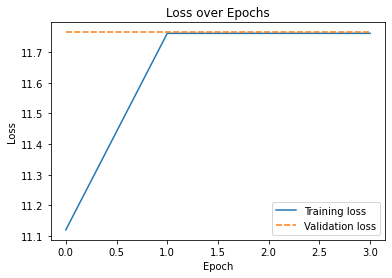

In [152]:
history_df = pd.DataFrame({'Training loss': history_thirteen_try.history['loss'], 'Validation loss': history_thirteen_try.history['val_loss']})
ax = sns.lineplot(data=history_df)
ax.set(xlabel='Epoch', ylabel='Loss', title='Loss over Epochs')

Plot of accuracy over epochs

[Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy over Epochs')]

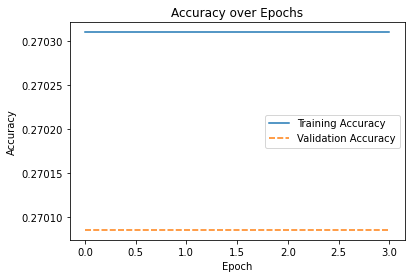

In [153]:
history_df = pd.DataFrame({'Training Accuracy': history_thirteen_try.history['accuracy'], 'Validation Accuracy': history_thirteen_try.history['val_accuracy']})
ax = sns.lineplot(data=history_df)
ax.set(xlabel='Epoch', ylabel='Accuracy', title='Accuracy over Epochs')

In [120]:
cnn_model13.save('saved_model/cnn_model13')

INFO:tensorflow:Assets written to: saved_model/cnn_model13\assets


# Analytical Findings

After creating multiple models and improving those, we still got our best result from the pretrained MobileNet with an accuracy of 96% on the test data set. This network is by far the most complex and the one pre-trained with the most images. The networks we built ourselves achieved an accuracy around 73% which is still a decent accuracy keeping in mind that we only have over 5000 images. A lot of our models underfit and got stuck at an accuracy of around 27% after one epoch. We tried to solve this problem by increasing the learning rate in case this underfit was due to a local minimum. We also tried to change the optimizer. We still got some networks stuck at the same accuracy. It’s also interesting that our very first try actually got an accuracy of 73% for the test data set and following models where we tried to improve the model by adding more layers got a lower accuracy of 27% on the test data set. (This model seems to be stuck at a local minimum.) We ran the same architecture just with more epochs again and the model got an accuracy of 73%. After adding another convolutional layer to the network and decreasing the learning rate our accuracy is stuck again at 27%. For the next model we only changed the loss to binary cross entropy loss and it improved the performance again to 73%. In the 6. model we added four more convolutional layers and increased the learning rate again, our accuracy wasn’t different from the one before. It seems like either there is another local minimum at 73% or this is the best accuracy we can get with our data (unlikely, since we got an accuracy of 96% with the MobileNet, but it could be the best performance we can reach with the level of complexity we used). We were wondering if the small size of the images had an impact on the classification so we decided to increase the picture size by almost 4 times. We used one of our more complex models again and decreased the learning rate. The accuracy got stuck at almost 73% after the second epoch, so we decided to increase the learning rate again. Unfortunately, it didn’t have an impact on the accuracy at all. As one of the last steps we decided to use Tensorboard to visualize the weights during training. We looked at some of the information we got from the Tensorboard but due to the time frame of this project we were not able to implement anything from the results of the Tensorboard. 
Lastly, we tried a different optimizer with a small and high learning rate and were able to improve our training accuracy by 0.5% to 73.5%. We also rotated some pictures to get an even better accuracy, but our accuracy went back down to 27%. 


# Conclusions

Overall, we can conclude that it is possible to create different NN with relatively good performances. Our best network reached an accuracy of 96%. But putting it in context, the performance of the network is not nearly good enough. The (training) data is too small to get a stable and acceptable result/accuracy. The field of which this algorithm would be used is the medical field and an accuracy of 96% is not high enough to actually rely on it. With an accuracy of 99% or over, the algorithm could help doctors to make a preselection by marking x-rays with obvious pneumonia and x-rays where it’s hard to detect. A doctor could then look at the preselected x-rays and be more efficient because he/she does not need to look at all of the x-rays. This would save time and people who are actually sick can get needed help sooner. For the given time and data, we think, we can still be happy with our outputs. We learned a lot about how to build and change features within the network. Lastly, we still want to mention a couple limitations of this project. On the one hand there is the time limitation due to the class schedule and on the other hand we only had over 5000 pictures to train our model with. The data set is imbalance and therefore, we had a lot more images of pneumonia than healthy lungs. In addition, the sizes of the images differ a lot between pneumonia and healthy lungs. This could be a problem because when we resize the images (224X224 for the MobileNet), there could potentially be differences in resolution across classes. For example, one class could have higher resolution images than the other, leading to bias in the model, or poorer performance than expected out of sample.